In [1]:
import pandas as pd
cust_df = pd.read_csv('customers.csv')
cust_df.shape

(5000, 3)

In [3]:
cust_df.head()

,customer_id,age_cat,freq_cat
0,1,age20~34,freq2
1,2,age35~49,freq0
2,3,age35~49,freq0
3,4,age~19,freq0
4,5,age35~49,freq0


In [4]:
cust_df.dtypes

customer_id     int64
age_cat        object
freq_cat       object
dtype: object

<AxesSubplot:>

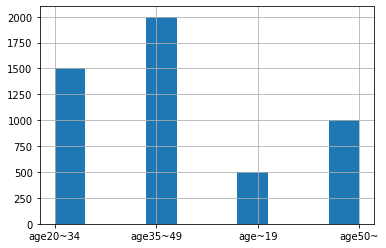

In [6]:
cust_df.age_cat.hist()

<AxesSubplot:>

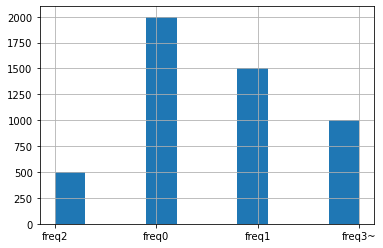

In [7]:
cust_df.freq_cat.hist()

In [8]:
cust_pivot_df = pd.pivot_table(data=cust_df, values='customer_id', columns='freq_cat', index='age_cat', aggfunc='count')
cust_pivot_df = cust_pivot_df.reindex([f'age{x}' for x in ['~19', '20~34', '35~49', '50~']])
cust_pivot_df

freq_cat,freq0,freq1,freq2,freq3~
age_cat,,,,
age~19,200,150,50,100
age20~34,600,450,150,300
age35~49,800,600,200,400
age50~,400,300,100,200


<AxesSubplot:xlabel='freq_cat', ylabel='age_cat'>

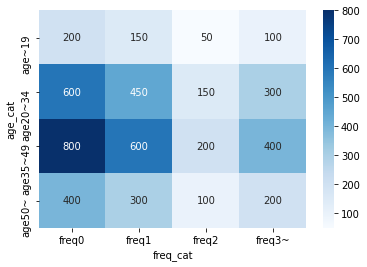

In [9]:
import seaborn as sns
sns.heatmap(cust_pivot_df, annot=True, fmt='d', cmap='Blues')

In [10]:
prob_df = pd.read_csv('visit_probability.csv')
prob_df.shape

(16, 6)

In [11]:
prob_df

,age_cat,freq_cat,segment_id,prob_dm1,prob_dm2,prob_dm3
0,age~19,freq0,1,0.07,0.12,0.29
1,age~19,freq1,2,0.21,0.30,0.58
2,age~19,freq2,3,0.28,0.39,0.74
3,age~19,freq3~,4,0.35,0.45,0.77
4,age20~34,freq0,5,0.11,0.17,0.37
5,age20~34,freq1,6,0.32,0.43,0.72
6,age20~34,freq2,7,0.42,0.55,0.93
7,age20~34,freq3~,8,0.52,0.63,0.94
8,age35~49,freq0,9,0.08,0.14,0.33
9,age35~49,freq1,10,0.25,0.35,0.67


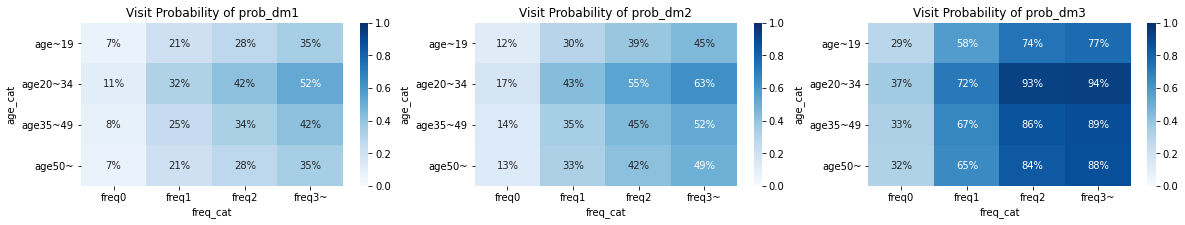

In [12]:
import matplotlib.pyplot as plt
ax = {}
fig, (ax[0], ax[1], ax[2]) = plt.subplots(1,3, figsize=(20,3))
for i in range(3):
    ptn = f'prob_dm{i+1}'
    prob_pivot_df = pd.pivot_table(data=prob_df, values=ptn, columns='freq_cat', index='age_cat')
    prob_pivot_df = prob_pivot_df.reindex([f'age{x}' for x in ['~19', '20~34', '35~49', '50~']])
    sns.heatmap(prob_pivot_df, vmin=0, vmax=1, annot=True, fmt='.0%', cmap='Blues', ax=ax[i])
    ax[i].set_title(f'Visit Probability of {ptn}')
plt.show()

In [13]:
import pulp
problem = pulp.LpProblem(name='DiscountCouponProblem1', sense=pulp.LpMaximize)

In [14]:
I = cust_df.customer_id.to_list()

In [15]:
M = [1,2,3]

In [16]:
xim = dict()
for i in I:
    for m in M:
        xim[i,m] = pulp.LpVariable(name=f'xim({i}, {m}', cat='Binary')
len(xim)

15000

In [17]:
for i in I:
    problem += pulp.lpSum(xim[i,m] for m in M) == 1

In [18]:
keys = ['age_cat', 'freq_cat']
cust_prob_df = pd.merge(cust_df, prob_df, on=keys)
cust_prob_df.head()

,customer_id,age_cat,freq_cat,segment_id,prob_dm1,prob_dm2,prob_dm3
0,1,age20~34,freq2,7,0.42,0.55,0.93
1,199,age20~34,freq2,7,0.42,0.55,0.93
2,200,age20~34,freq2,7,0.42,0.55,0.93
3,255,age20~34,freq2,7,0.42,0.55,0.93
4,269,age20~34,freq2,7,0.42,0.55,0.93


In [19]:
cust_prob_ver_df = cust_prob_df.rename(columns={'prob_dm1':1, 'prob_dm2':2, 'prob_dm3':3})\
                               .melt(id_vars=['customer_id'], value_vars=[1,2,3], var_name='dm', value_name='prob')
cust_prob_ver_df

,customer_id,dm,prob
0,1,1,0.42
1,199,1,0.42
2,200,1,0.42
3,255,1,0.42
4,269,1,0.42
...,...,...,...
14995,4474,3,0.74
14996,4596,3,0.74
14997,4720,3,0.74
14998,4910,3,0.74


In [20]:
Pim = cust_prob_ver_df.set_index(['customer_id', 'dm'])['prob'].to_dict()

In [21]:
Pim

{(1, 1): 0.42,
 (199, 1): 0.42,
 (200, 1): 0.42,
 (255, 1): 0.42,
 (269, 1): 0.42,
 (319, 1): 0.42,
 (399, 1): 0.42,
 (426, 1): 0.42,
 (456, 1): 0.42,
 (459, 1): 0.42,
 (511, 1): 0.42,
 (575, 1): 0.42,
 (577, 1): 0.42,
 (642, 1): 0.42,
 (648, 1): 0.42,
 (673, 1): 0.42,
 (699, 1): 0.42,
 (703, 1): 0.42,
 (720, 1): 0.42,
 (747, 1): 0.42,
 (751, 1): 0.42,
 (787, 1): 0.42,
 (797, 1): 0.42,
 (847, 1): 0.42,
 (852, 1): 0.42,
 (902, 1): 0.42,
 (922, 1): 0.42,
 (976, 1): 0.42,
 (1026, 1): 0.42,
 (1069, 1): 0.42,
 (1118, 1): 0.42,
 (1131, 1): 0.42,
 (1197, 1): 0.42,
 (1202, 1): 0.42,
 (1211, 1): 0.42,
 (1264, 1): 0.42,
 (1275, 1): 0.42,
 (1404, 1): 0.42,
 (1453, 1): 0.42,
 (1490, 1): 0.42,
 (1501, 1): 0.42,
 (1505, 1): 0.42,
 (1520, 1): 0.42,
 (1559, 1): 0.42,
 (1579, 1): 0.42,
 (1592, 1): 0.42,
 (1629, 1): 0.42,
 (1650, 1): 0.42,
 (1735, 1): 0.42,
 (1748, 1): 0.42,
 (1891, 1): 0.42,
 (1892, 1): 0.42,
 (1929, 1): 0.42,
 (1932, 1): 0.42,
 (1933, 1): 0.42,
 (2021, 1): 0.42,
 (2053, 1): 0.42,
 (20

In [22]:
Pim[1,1]

0.42

In [23]:
problem += pulp.lpSum((Pim[i,m] - Pim[i,1]) * xim[i,m] for i in I for m in [2,3])

In [24]:
Cm = {1:0, 2:1000, 3:2000}

In [25]:
problem += pulp.lpSum(Cm[m] * Pim[i,m] * xim[i,m] for i in I for m in [2,3]) <= 1000000

In [26]:
S = prob_df.segment_id.to_list()
len(S)

16

In [27]:
Ns = cust_prob_df.groupby('segment_id')['customer_id'].count().to_dict()
Ns

{1: 200,
 2: 150,
 3: 50,
 4: 100,
 5: 600,
 6: 450,
 7: 150,
 8: 300,
 9: 800,
 10: 600,
 11: 200,
 12: 400,
 13: 400,
 14: 300,
 15: 100,
 16: 200}

In [28]:
Si = cust_prob_df.set_index('customer_id')['segment_id'].to_dict()

In [30]:
for s in S:
    for m in M:
        problem += pulp.lpSum(xim[i,m] for i in I if Si[i]==s) >= 0.1 * Ns[s]

In [31]:
import time
time_start = time.time()
status = problem.solve()
time_stop = time.time()
print(f'status:{pulp.LpStatus[status]}')
print(f'goal function value:{pulp.value(problem.objective):.4}')
print(f'calc time:{(time_stop - time_start)} second')

status:Optimal
goal function value:326.1
calc time:7.045601844787598 second


In [32]:
send_dm_df = pd.DataFrame([[xim[i,m].value() for m in M] for i in I], columns=[f'send_dm{i+1}' for i in range(3)])

In [33]:
send_dm_df

,send_dm1,send_dm2,send_dm3
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
4995,0.0,1.0,0.0
4996,0.0,0.0,1.0
4997,1.0,0.0,0.0
4998,1.0,0.0,0.0


In [34]:
cust_send_df = pd.concat([cust_df[['customer_id', 'age_cat', 'freq_cat']], send_dm_df], axis=1)
cust_send_df

,customer_id,age_cat,freq_cat,send_dm1,send_dm2,send_dm3
0,1,age20~34,freq2,0.0,1.0,0.0
1,2,age35~49,freq0,0.0,1.0,0.0
2,3,age35~49,freq0,0.0,1.0,0.0
3,4,age~19,freq0,0.0,1.0,0.0
4,5,age35~49,freq0,0.0,1.0,0.0
...,...,...,...,...,...,...
4995,4996,age50~,freq0,0.0,1.0,0.0
4996,4997,age50~,freq0,0.0,0.0,1.0
4997,4998,age35~49,freq1,1.0,0.0,0.0
4998,4999,age50~,freq1,1.0,0.0,0.0


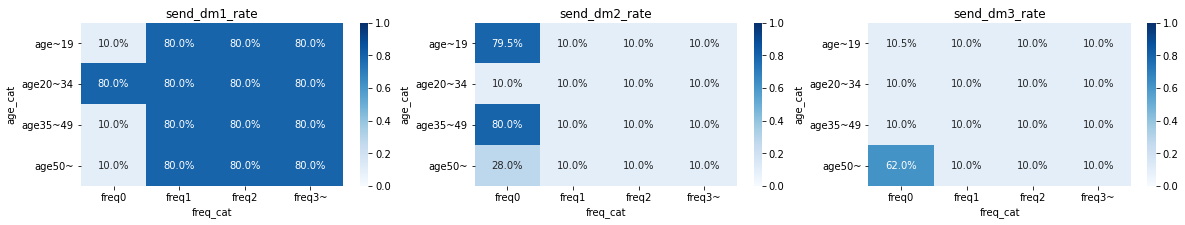

In [35]:
ax = {}
fig, (ax[0], ax[1], ax[2]) = plt.subplots(1,3,figsize=(20,3))
for i in range(3):
    ptn = f'send_dm{i+1}'
    cust_send_pivot_df = pd.pivot_table(data=cust_send_df, values=ptn, columns='freq_cat', index='age_cat', aggfunc='mean')
    cust_send_pivot_df = cust_send_pivot_df.reindex([f'age{x}' for x in ['~19', '20~34', '35~49', '50~']])
    sns.heatmap(cust_send_pivot_df, annot=True, fmt='.1%', cmap='Blues', vmin=0, vmax=1, ax=ax[i])
    ax[i].set_title(f'{ptn}_rate')
plt.show()

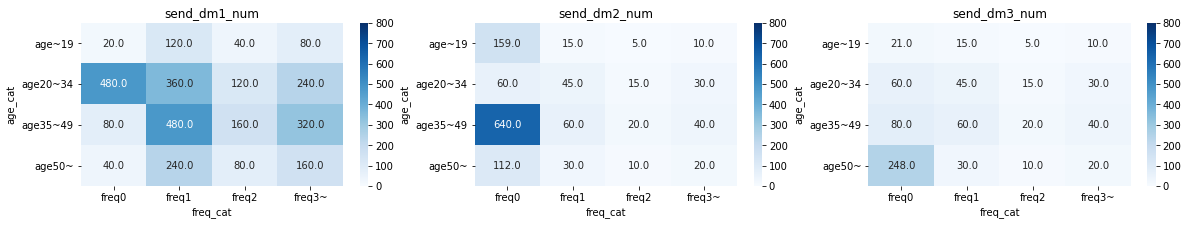

In [38]:
ax = {}
fig, (ax[0], ax[1], ax[2]) = plt.subplots(1,3,figsize=(20,3))
for i in range(3):
    ptn = f'send_dm{i+1}'
    cust_send_pivot_df = pd.pivot_table(data=cust_send_df, values=ptn, columns='freq_cat', index='age_cat', aggfunc='sum')
    cust_send_pivot_df = cust_send_pivot_df.reindex([f'age{x}' for x in ['~19', '20~34', '35~49', '50~']])
    sns.heatmap(cust_send_pivot_df, annot=True, fmt='.1f', cmap='Blues', vmin=0, vmax=800, ax=ax[i])
    ax[i].set_title(f'{ptn}_num')
plt.show()

In [41]:
import pickle
with open('chap04_sample_result.pkl', 'wb') as f:
    pickle.dump(cust_send_df, f)
